# SUSA CX Kaggle Capstone Project
## Part 3: Hyperparameter Tuning, Decision Trees, Ensemble Learning

### Table Of Contents
* [Introduction](#section1)
* [Hyperparameters](#section2)
* [GridSearch](#section2i)
* [Decision Trees](#section3)   
* [Random Forest](#section4)
* [Ensemble Learning](#section5)
* [Conclusion](#conclusion)
* [Additional Reading](#reading)


### Hosted by and maintained by the [Statistics Undergraduate Students Association (SUSA)](https://susa.berkeley.edu). Originally authored by [Patrick Chao](mailto:prc@berkeley.edu) & [Noah Gundotra](mailto:noah.gundotra@berkeley.edu).

<a id='section1'></a>
# SUSA CX Kaggle Capstone Project

Welcome to the third week of the SUSA CX Kaggle Capstone! Now that you have an understanding of your data, a cleaned dataset, and a working model, now it's time to improve your model performance with some new tricks and techniques. Now that we have explored regularization techniques, PCA for feature selection and dimension reduction, and feature engineering, we will delve into more technical details and advanced models.



## Logistics

Most of the logistics are the same as last week, but we are repeating them here for your convenience. Please let us know if you or your teammates are feeling nervous about the pace of this project - remember that we are not grading you on your project, and we really try to make the notebooks relatively easy and fast to code through. If for any reason you are feeling overwhelmed or frustrated, please DM us or talk to us in person. We want all of you to have a productive, healthy, and fun time learning data science! If you have any suggestions or recommendations on how to improve, please do not hesitate to reach out!

## Datathon

For those of you that came to the Datathon, we hope you all had a great time! It seemed that many people got a lot of work done and learned a ton of new materials. We had a quick lecture by Patrick on the mathematical intuitions on regularization and PCA. If you couldn't make it or didn't understand all the details, feel free to reach out! Also if you felt that the lecture was very helpful and you would like to see more similar stuff, let us know!

### Mandatory Office Hours

Because this is such a large project, you and your team will surely have to work on it outside of meetings. In order to get you guys to seek help from this project, we are making it **mandatory** for you and your group to attend **two (2)** SUSA Office Hours over the next 4 weeks. This will allow questions to be answered outside of the regular meetings and will help promote collaboration with more experienced SUSA members.

The schedule of SUSA office hours are below:
https://susa.berkeley.edu/calendar#officehours-table

We understand that most of you will end up going to Arun or Patrick's office hours, but we highly encourage you to go to other people's office hours as well. There are many qualified SUSA mentors who can help and this could be an opportunity for you to meet them.

In [1]:
# Import statements
from sklearn import tree # There are lots of other models from this module you can try!
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression, Ridge
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
sqrt=np.sqrt

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


<a id='section2'></a>
# Hyperparameters and Tuning

As we have discussed in the project workflow, we are beginning to investigate more technical models. However, as we continue to explore more and more complex models, we may lose interpretability. Many problems in machine learning or data science eventually reduce to some parameters we are incapable of understanding or predicting ahead of time. These may be parameters inherent to the dataset or based on the model.

If we look back at k-Nearest Neighbors, based on different values of $k$ we obtain various models. For $k=1$, we obtain a low bias and high variance estimate. Our estimate is highly dependent on the data available. As $k$ increases, our bias increases but the variance decreases. We would like to minimize both bias and variance, thus the optimal value of $k$ lies somewhere between these values. How do we determine this value? Unfortunately there is no golden bullet or magical formula we may calculate to answer this question.

These mystical quantities we would like to evaluate are known as **hyperparameters**. Hyperparameters are values in our model that we cannot optimize directly, instead we may have to explore a variety of examples before determining the optimal value. In kNN, the value of $k$ characterizes the model. Thus we may describe this as a **model hyperparameter**. If we were using polynomial regression, the degree of the model would also be a model hyperparameter, as we can arbitrarily select the power and it characterizes our model.

Another example of a hyperparameter is the $\lambda$ used in Ridge and LASSO regression. There is essentially no method of evaluating the optimal value of $\lambda$ through calculations, instead we must experiment and emperically determine the best value. These do not determine the form of the model, but affect the optimization. Thus this is an **optimization hyperparameter**.

We may imagine hyperparameters as a bunch of individual knobs we may turn. Consider that we are visiting our friend and staying at her place. However, you did not realize that she is actually an alien and her house is filled with very strange objects. When you head to bed, you attempt to use her shower, but see that her shower is has a dozen of knobs that control the temperature of the water coming out! We only have a single output to work off of, but many different knobs or *parameters* to adjust. If the water is too hot, we can turn random knobs until it becomes cold, and learn a bit about our environment. We may determine that some knobs are more or less sensitive, just like hyperparameters. Each knob in the shower is equivalent to a hyperparameter we can tune in a model.

<a id='section2i'></a>
# Grid Search

Consider we have two hyperparameters $A$ and $B$ that range from $0$ to $100$. 

> 1. Discuss with a group on possible methods of deciding the optimal value of $A$ and $B$?
> 2. Is it possible to find the exact best values of $A$ and $B$?

One of the most naive approaches is to simply create a grid of values for $A$ and $B$, hence the name grid search. We could consider choosing the values where $A$ or $B$ are equal to $0,50,100$, and determine the validation error on all pairs of hyperparameters. Since there are $3$ values for both $A$ and $B$, there are $9$ total possible choices for $(A,B)$.

Consider the following grid below.

<img src="GRAPHICS/grid1.png" width="30%">

The grid represents the validation error for all $(A,B)$ from $[0,50,100]$. It may seem that $(A,B)=(50,100)$ is the best value with an error of $7$, but our scale is quite coarse. We could instead have four values for $A$ and $B$, resulting in $16$ total calculations. This is shown below with $[0,33,66,100]$.
<img src="GRAPHICS/grid2.png" width="30%">

Now the optimal value shifts to $(A,B)=(66,33)$ with an error of $7$, but this will change again as our interval becomes more and more fine. However, a few issues immediately arise. First, the number of calculations increases quadratically with the number of values for each interval! This is quite bad, as quadratic functions grow quite quickly. Secondly, we can never really determine the exact optimal value unless we had infinitely fine intervals. Lastly, we only had a decrease in error from $7$ to $5$ with $9$ to $16$ calculations. Is this actually worthwhile? Sometimes performing more searches does not actually help. These are all various tradeoffs to decide, at a certain point the number of calculations is not worth the added benefit of well tuned parameters.

Now, this is only for the two variable case with $A$ and $B$. In practice, models may have many variables, even dozens! If we consider $10$ parameters, just doing two values for an interval results in $2^{10}=1024$ calculations! Keep in mind that each value in the grid requires a separate model to be trained using the parameters, which results in $1024$ different models to be trained with just a comparison of two values for each parameter! The number of models trained is equal to $m^n$ where $m$ is the number of values in the interval, and $n$ is the number of hyperparameters.

Grid search can be very challenging due to this issue, and suffers from the curse of dimensionality. There are other approaches that are used in practice. Instead of methodically selecting all pairs of values in the cartesian product, we could perform a [random search](https://en.wikipedia.org/wiki/Random_search) through parameters. Even more complex, we can create a model to estimate the optimal parameters. This leads into the field of [meta-learning](http://bair.berkeley.edu/blog/2017/07/18/learning-to-learn/), learning to learn.

<a id='section3'></a>
# Decision Trees with Grid Search

Now that we have investigated how hyperparameters affect our models, we may apply it directly to our current problem of predicting housing prices. In this section, we will be going over decision trees. If you would like a refresher, please refer to this [notebook](../Machine%20Learning/BiasVarianceDecisionTrees/Bias%20Variance%20Decision%20Trees%20Ensemble%20Learning.ipynb)!

In the past, we talked about decision trees as purely classification. In practice, we can also use decision trees for regression! Rather than have a single class at the leaves and attempting to reduce the impurity or entropy of individual leaves, we have individual functions at the leaves of the decision tree. 

First, we will load in the cleaned data and import the necessary libraries.

In [2]:
def get_features(data, col_list, y_name):
    """
    Function to return a numpy matrix of pandas dataframe features, given k column names and a single y column
    Outputs X, a n X k dimensional numpy matrix, and Y, an n X 1 dimensional numpy matrix.
    This is not a smart function - although it does drop rows with NA values. It might break. 
    
    data(DataFrame): e.g. train, clean
    col_list(list): list of columns to extract data from
    y_name(string): name of the column you to treat as the y column
    
    Ideally returns one np.array of shape (len(data), len(col_list)), and one of shape (len(data), len(col_list))
    """
    
    # keep track of numpy values
    feature_matrix = data[col_list + [y_name]].dropna().values
    np.random.shuffle(feature_matrix)
    return feature_matrix[:, :-1], feature_matrix[:, -1]

def get_loss(model, X,Y_true):
    """Returns square root of L2 loss (RMSE) from a model, X value input, and true y values
    
    model(Model object): model we use to predict values
    X: numpy matrix of x values
    Y_true: numpy matrix of true y values
    """
    Y_hat = model.predict(X)
    return get_RMSE(Y_hat,Y_true)

def get_RMSE(Y_hat,Y_true):
    """Returns square root of L2 loss (RMSE) between Y_hat and true values
    
    Y_true: numpy matrix of predicted y values
    Y_true: numpy matrix of true y values
    """
    return np.sqrt(np.mean((Y_true-Y_hat)**2))

def get_train_and_val(X,Y):
    """Given the X and Y data, return the training and validation based on the split variable
    
    X: numpy matrix of x values
    Y: numpy matrix of y values
    split: value between 0 and 1 for the training split
    """
    
    Y = Y.reshape(Y.shape[0],)

    train_index,_ = get_train_val_indices(X,Y)

    y_train = Y.reshape(Y.shape[0],)
    y_train = Y[:train_index]
    x_train = X[:train_index,:]

    x_val = X[train_index:,:]
    y_val = Y[train_index:]
    return (x_train,y_train),(x_val,y_val)

def get_train_val_indices(X,Y=None,split=0.7):
    train_index = (int)(X.shape[0]*split)
    test_index =X.shape[0]-1
    return train_index,test_index

def grid_search(model,grid_params,verbose=True):
    """ Given a model and a set of parameters, this will search through the grid of parameters
    
    model: model input ex: tree.DecisionTreeRegressor()
    grid_params: dictionary of parameter values, parameter to list
    verbose: boolean default to true, prints the value of all scores in the grid
    
    Modified from http://scikit-learn.org/0.15/auto_examples/grid_search_digits.html
    """

    clf=GridSearchCV(model,param_grid = grid_params,n_jobs=-1,cv=3,scoring=make_scorer(get_RMSE,greater_is_better=False))
    clf.fit(X,Y)
    if verbose:
        print("Grid scores on development set:")
        for params, mean_score, scores in clf.grid_scores_:
            print("%0.3f (+/-%0.03f) for %r"
                  % (-1*mean_score, scores.std() / 2, params))
        print()
    print("Best parameters set found:")
    print(clf.best_params_)
    print()
    print("Best score found:")
    print(-1*clf.best_score_)
    print()
    
def feature_importance(model,features,num_features = 10):
    importances = sorted(zip(list(model.feature_importances_),features),reverse=True,key=lambda x :x[0])
    return importances[:num_features]

Most of the code above is the same as last week with a few tweaks and added methods. A few important changes: now the training and validation set is randomized, so you may obtain different losses based on different random initalizations.

Replace `feature_cols` with the features you chose in the previous notebook. For decision trees, we would recommend having more features rather than fewer, recommended to have at least $10$. 

We will first read in the data, select the relevant features, and separate into training and validation.

In [3]:
clean = pd.read_csv('DATA/house-prices/train_cleaned.csv')
#feature_cols = ['LotArea', 'Utilities', 'OverallCond', 'BsmtFinSF1', 'MasVnrArea']

def select_columns_except(dframe, non_examples):
    """Returns all comlumns in dframe except those in non_examples."""
    all_cols = dframe.select_dtypes(include=[np.number]).columns.tolist()
    cond = lambda x: sum([x == col for col in non_examples]) >= 1
    return [x for x in all_cols if not cond(x)]
    
feature_cols = select_columns_except(clean, ['Id','SalePrice'])

X, Y = get_features(clean, feature_cols, 'SalePrice')
(x_train,y_train),(x_val,y_val) = get_train_and_val(X,Y)

Now using sklearn, we will train a decision tree regressor with all default parameters. Keep in mind since we have a small dataset and our decision tree may vary wildly with each optimization, the RMSE will also change greatly from each time you run it! This dataset is particularly small so it does not fair well with very deep trees. 

In [4]:
decisionTree = tree.DecisionTreeRegressor()
decisionTree = decisionTree.fit(x_train, y_train)
loss = get_loss(decisionTree, x_val,y_val)
print("Root Mean Squared Error loss of our model: {:.2f}".format(loss))

Root Mean Squared Error loss of our model: 49104.59


Now we will experiment with $3$ hyperparameters in the decision tree sklearn implementation. There are more than $3$ hyperparameters, but we will stick with three for simplicity.

The three we are using are `max_depth`, `min_samples_split`, and `min_samples_leaf`. 
> `max_depth`: The maximum depth of any branch in the tree. As max_depth increases, our tree gets more and more complex and is more likely to overfit to the data.    
> `min_samples_split`: Since each branch can continue splitting to obtain more and purer leaves, eventually it may not make sense to continue splitting as we may be overfitting. To avoid this, we may set a min_samples_split, which represents the minimum number of samples to split on.     
> `min_samples_leaf`: We can continue our decision tree until the leaves become very small and we overfit. Another restraint could be to have a minimum value restricting the number of samples in a leaf. 

The code below runs a grid search on the parameters chosen. Feel free to modify the ranges for all the hyperparameters! This is a crucial part of model selection. 

The `grid_search` function takes in a model, a dictionary of a set of parameters, and a boolean flag for verbose. The model in our case will just be `tree.DecisionTreeRegressor()`, and the parameters is equal to `grid_params`. Feel free to change the verbose flag to True if you would like to view all the outputs.

In [5]:
grid_params = [{'max_depth':[4,6,8,10,12],'min_samples_leaf':[4,6,8,10,12,14],'min_samples_split':[6,8,10,12,14,16]}]
grid_search(tree.DecisionTreeRegressor(),grid_params,verbose=False)

Best parameters set found:
{'max_depth': 12, 'min_samples_leaf': 14, 'min_samples_split': 6}

Best score found:
39061.36231712229



In [6]:
decisionTree = tree.DecisionTreeRegressor(max_depth=8,min_samples_leaf=10,min_samples_split=4)
decisionTree = decisionTree.fit(x_train, y_train)
loss = get_loss(decisionTree, x_val,y_val)
print("Root Mean Squared Error loss of our model: {:.2f}".format(loss))

Root Mean Squared Error loss of our model: 41990.66


Another great thing about sklearn's decision tree implementation is that it can also tell you the relative feature importance! The code segment below

In [7]:
feature_importance(decisionTree,feature_cols)

[(0.6627461618560726, 'OverallQual'),
 (0.09189457508797685, 'FullBath'),
 (0.0845968557211614, 'GrLivArea'),
 (0.03533809127139684, 'GarageCars'),
 (0.02590636454689453, 'LotArea'),
 (0.020624478955062236, 'TotalBsmtSF'),
 (0.01544246585165406, 'BsmtFinSF1'),
 (0.011474104724860176, 'BsmtFinType1'),
 (0.010151190643973431, '1stFlrSF'),
 (0.009576159868901217, 'GarageArea')]

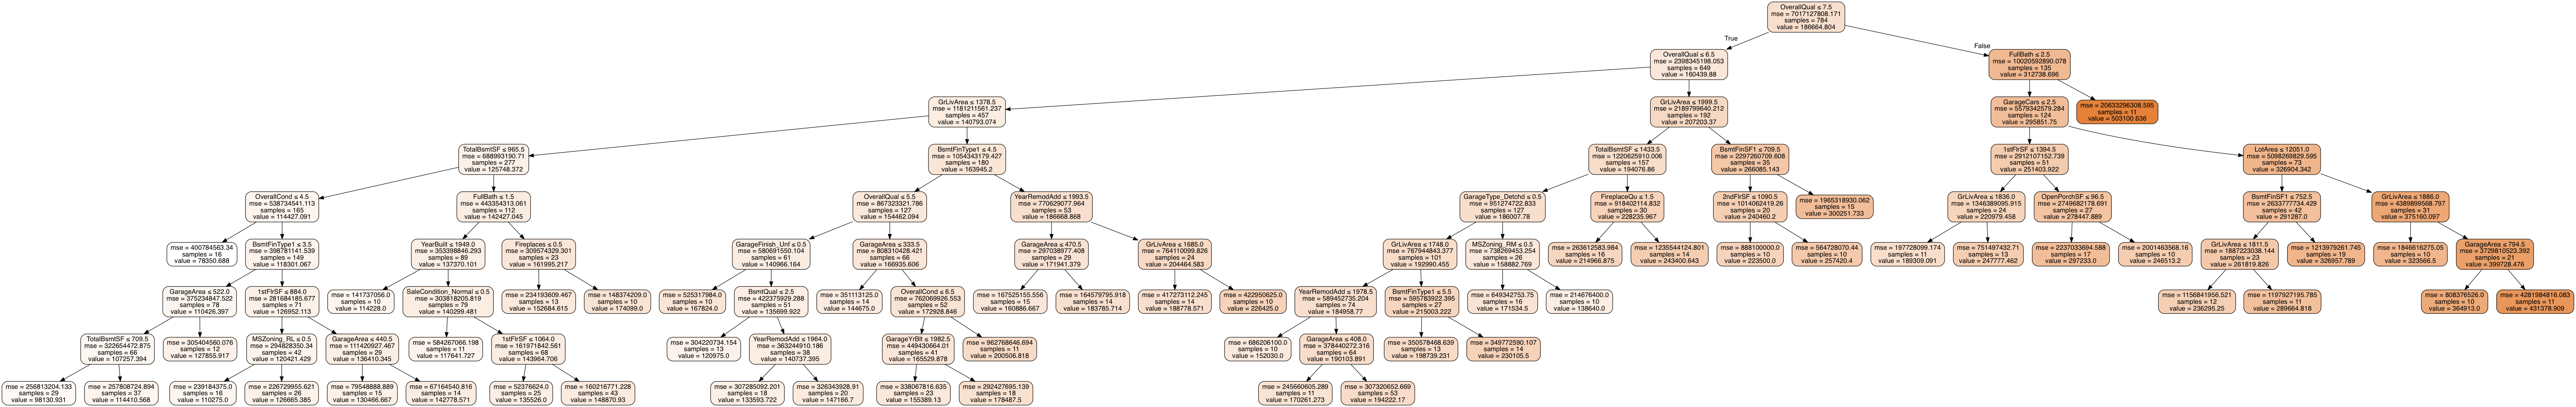

In [8]:
dot_data = StringIO()
export_graphviz(decisionTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<a id='section4'></a>
# Random Forest

Now we have thoroughly investigated decision trees, but why stop there? We can collect a bunch of trees to form a **random forest**! A very quick reminder for what random forests are: collect a bunch of trees, and average their results. Averaging may be taking the majority in a classification problem, or the mean of the regression output of each tree. In order to prevent each of the trees being identical, we randomly sample portions of the data to train on and random features to use in our forest. 

The code is very similar and we will take advantage of sklearn's implementation of random forests.

In [9]:
randomForest = RandomForestRegressor()
randomForest = randomForest.fit(x_train, y_train)
loss = get_loss(randomForest, x_val,y_val)
print("Root Mean Squared Error loss of our model: {:.2f}".format(loss))

Root Mean Squared Error loss of our model: 34999.09


Wow! This random forest already performs far better than our other models. Can we tune some parameters as before? Now we may add the `n_estimators` parameter, which is basically how many trees we have in our ensemble. 
 
**Warning**: This may take a long time to run! Do not try to search too much at once.

In [10]:
grid_params = [{'max_depth':[12,14,16,18], 'min_samples_leaf':[1,2,4],'min_samples_split':[2,3,4,6,8,10],
                     'n_estimators':[20,30,40],'random_state':[0],'bootstrap':[False,True]}]
grid_search(RandomForestRegressor(),grid_params,verbose=False)

Best parameters set found:
{'bootstrap': True, 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 40, 'random_state': 0}

Best score found:
31256.374319861905



In [11]:
randomForest = RandomForestRegressor(max_depth=14,min_samples_leaf=1,min_samples_split=4,
                                     n_estimators=50,random_state=0,bootstrap=True)
randomForest = randomForest.fit(x_train, y_train)
loss = get_loss(randomForest, x_val,y_val)
print("Root Mean Squared Error loss of our model: {:.2f}".format(loss))

Root Mean Squared Error loss of our model: 31887.32


We can look at the feature importances again as before.

In [12]:
feature_importance(randomForest,feature_cols)

[(0.58203490449559, 'OverallQual'),
 (0.12572190290898183, 'GrLivArea'),
 (0.025624356998559236, '2ndFlrSF'),
 (0.022798436989722816, 'FullBath'),
 (0.021422479747895594, 'BsmtFinSF1'),
 (0.019430065335522398, 'TotalBsmtSF'),
 (0.017558177533714636, '1stFlrSF'),
 (0.01634317421707168, 'TotRmsAbvGrd'),
 (0.015703356117036747, 'YearBuilt'),
 (0.013273357193443872, 'LotArea')]

<a id='section5'></a>
# Ensemble Learning
----

Ensemble learning is one of the most widely used techniques to improve model accuracy. Many automated, programmatic frameworks for simple modeling tasks lend themselves to being ensembled. 

Ensembling is the process of training multiple models to do the same thing, and averaging their predictions. Ensemble models often train their models on different (overlapping) splits of the dataset. These datasets are picked randomly _**with**_ replacement. Intuitively, you can imagine training the same type of linear model and giving each model only 1 category of data to learn from. It's possible to imagine that each linear model as becoming an expert in its dataset, and can contribute unique information to other expert models. From a high level perspective, ensembling is merging the expert opinions of different models.

From this narrative, we can see how very different models produce a much more useful ensemble than identical models. Clearly, having 10 modes that detects numbers 0-9 is more useful to digit detection than having 10 models which all detect the number 1. This is known as independence of errors. 

Along this note... There are good formal **statistical** and **mathematical** reasons to do ensembling. One of the easier things to prove about ensembling is that averaging model predictions actually reduces variance on error.

We just wanted to introduce you to what the math looks like, in case you're interested. The following is from the Deep Learning Book (Goodfellow 2016). Given $k$ models, with errors $\epsilon_i$ on each example, and errors with variance $v$, the expected loss of the model decreases as more models are ensembled. Specifically, this works when the correlation between the models, $c$, is less than 1.

$$
\begin{align}
\mathbb{E}\left[\left(\frac{1}{k} \sum_i \epsilon_i\right)^2\right] &= \frac{1}{k^2}\mathbb{E}\left[\sum_{i}\left(\epsilon_i^2 + \sum_{j\not=i} \epsilon_i\epsilon_j\right)\right] \\
&= \frac{1}{k}v + \frac{k-1}{k}c
\end{align}
$$

A second good reason to use ensembling is to improve the space of representations that the aggregate (total) model can learn. Understanding this line of reasoning requires the ability to visualize a model's decision boundary. Essentially, multiple single models can overfit to the data, creating complex, abstract hyperplanes to separate between classifications.

![Ensemble of overfit models](GRAPHICS/overfitboundary.png)

If you're interested in reading up on this, and learning where that figure came from, check out [MLWave's explanation.](https://mlwave.com/kaggle-ensembling-guide/)

### Do not worry about the math!

We do not need to understand it to understand how ensembling works. We'll begin our practical walk through below.


In [13]:
# This is my favorite approach! Try everything lazy and grab all the low-hanging fruit!
# Brute force everything!

# Create `num_models` of models of decision trees with random max_depth
# And train them before appending to a list of models
# Creating LinearRegression models trained on different datasets have less correlated errors
# TODO: Why don't you try using this function with tree.DecisionTree? This is an alternate RandomForest implementation
# TODO: Can you extend this function to work accept any list of model functions?
def create_models(model_func, num_models, frac_dataset, x_train):
    """Trains `num_models` of model_func instances on `frac_dataset` percent of the x_train."""
    models = []
    for i in range(num_models):
        num_dataset = int(frac_dataset * len(x_train))
        indices = np.random.permutation(num_dataset)
        x_random, y_random = x_train[indices], y_train[indices]
        models.append(model_func().fit(x_random, y_random))
    return models

model_func = lambda : LinearRegression()
models = create_models(model_func, 10, 0.7, x_train)

def avg_model(ms):
    """Returns a lambda that can be used to predict over all the models."""
    def predict(x_input):
        """Ensembles model predictions using an unweighted average."""
        total = len(ms)
        return sum([model.predict(x_input) for model in models]) / total
    return predict

def get_loss_from_function(predict_function, X, Y_true):
    """Returns square root of L2 loss (RMSE) between Y_hat and true values
    
    predict_function(function): model we use to predict values
    X: numpy matrix of x values
    Y_true: numpy matrix of true y values
    """
    Y_hat = predict_function(X)
    return np.sqrt(np.mean((Y_true-Y_hat)**2))

# Now we can use the models we trained to create an averaged ensemble
avg_model_predict = avg_model(models)
loss = get_loss_from_function(avg_model_predict, x_train, y_train)
print("Train loss: {:.2f}".format(loss))
loss = get_loss_from_function(avg_model_predict, x_val, y_val)
print("Validation loss: {:.2f}".format(loss))

Train loss: 32832.65
Validation loss: 47417.03


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Yay! Clearly, the loss on this model is much better than the loss of the previous best decision tree!

## Smarter Ensembling - Weighted Averages

Some models are better than others, so we can train a model to learn how to weigh the predictions of the models. We can do this by saving the predictions of a bunch of models, and then learning a weighted average of them that predicts `y_train` (using a Linear Model). If using a linear model to learn the weights of the ensemble doesn't make sense - don't fret.

Let the ensembled model output be $f(x)$, and the output of model $i$ be $m_i$.
$$ f(x) = a_1*m_1(x) + a_2*m_2(x) + \ldots + a_n*m_n(x) $$
This is a **_linear_** transformation, which means a linear model can learn the weights $a_1, a_2, \cdots, a_n$.

In [14]:
def get_ensemble_features(models, x_input):
    """Returns the features for an ensemble by passing the original input through the original base models."""
    model_predictions = np.concatenate([model.predict(x_input) for model in models]).reshape((-1, len(models)))
    return model_predictions

ensemble_features = get_ensemble_features(models, x_train)

linear_ensemble_model = Ridge().fit(ensemble_features, y_train)

loss = get_loss(linear_ensemble_model, get_ensemble_features(models, x_train), y_train)
print(loss)
loss = get_loss(linear_ensemble_model, get_ensemble_features(models, x_val), y_val)
print(loss)

83377.60817515169
82041.14458338366


In [15]:
linear_ensemble_model.coef_ = np.array([1/10.0 for i in range(10)])

This clearly didn't work nearly as well as the model averaging! This is probably because the method by which Sci-Kit learn calculates least squares regression assumes very low correlation between features. It's possible that they leveraged this to produce a method which is not as good at learning a linear model over similar ensembles.

Other things to try would be performing least squares regression on the ensembles' outputs. That should probably work. In general, the practice of building models on top of other models is called **ensemble stacking.** This a very big subfield of statistical modeling that is responsible for the difference between a good model and an award-winning model. Specifically, **gradient-boosting** is a very widely used approach. See the [Additional Reading](#section) section for more.

# Conclusion

This ends the third of our four collaborative sessions on the Kaggle Housing Prices competition. This week contains a lot of technical material, but a large majority is running code chunks and thinking about what the models actually do. As always, please email [Arun Ramamurthy](mailto:contact@arun.run), [Patrick Chao](mailto:prc@berkeley.edu), or [Noah Gundotra](mailto:noah.gundotra@berkeley.edu) or with any questions or concerns whatsoever. 

Next week, we will be wrapping things up by investigating how to apply DeEp lEArNinG with neural networks to this problem in Keras! This is the final culmination of all the work we have done so far, as well as finally submitting to compare your performances! Happy machine learning!

<a id='reading'></a>
# Additional Reading

This notebook we covered a lot of different modeling tools. However, we have barely scratched the surface. Even though we have not presented as much math as in previous presentations, there is a lot of theory behind these tools. 

The most widely used tools are variants of decision trees. One of the most popular variants of random forest modeling is called [Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting). The framework that implements this particularly well is called [XGBoost](https://github.com/dmlc/xgboost).

Sci-kit learn has a lot of ensemble methods built-in as well. Their documentation is probably some of the best out there, it's absolutely littered with examples. See the [ensemble docs](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) for more. 

If you're interested in different types of models to use in your ensemble, try out Logistic Regression in the sci-kit learn library. For the full list of models, see [their docs](http://scikit-learn.org/stable/supervised_learning.html